As part of the hiring process, we would like you to create a CNN model to detect and segment solar panels in satellite photos. You may use a public dataset and even a pre-trained model to complete the task. The purpose of this test is to evaluate your ability to train or use a pre-trained model to solve a real-world computer vision problem.


# Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Proactiveware/

/content/drive/.shortcut-targets-by-id/1AXeAI-Dkxt_gi04CGs4FtrmQR_QWfIlR/Proactiveware


In [3]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 24.0 MB/s eta 0:00:00


# Library

In [4]:
from ultralytics import YOLO
from PIL import Image

# How to Prepare Data to Train the YOLOv8 Model


In [5]:
model = YOLO("yolov8m.pt")

In [6]:
# {object_class_id} {x_center} {y_center} {width} {height}
model.train(data="/content/drive/MyDrive/Proactiveware/data/for_YOLO_v6/data.yaml", epochs=150)

Ultralytics YOLOv8.0.105 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Proactiveware/data/for_YOLO_v6/data.yaml, epochs=150, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False

  0%|          | 0/73 [00:05<?, ?it/s]


RuntimeError: ignored

In [ ]:
model = YOLO("/content/drive/MyDrive/Proactiveware/runs/detect/train4/weights/best.pt")
    # results = model.predict(Image.open(buf))

In [ ]:
results = model.predict("/content/drive/MyDrive/Proactiveware/data/folder_for_test_pic/test_1.png")


image 1/1 /content/drive/.shortcut-targets-by-id/1AXeAI-Dkxt_gi04CGs4FtrmQR_QWfIlR/Proactiveware/data/folder_for_test_pic/test_1.png: 224x640 10 panels, 26 roofs, 20.3ms
Speed: 1.9ms preprocess, 20.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:

result = results[0]
# print(result.boxes)
output = []
for box in result.boxes:
    x1, y1, x2, y2 = [
        round(x) for x in box.xyxy[0].tolist()
    ]
    class_id = box.cls[0].item()
    prob = round(box.conf[0].item(), 2)
    output.append([
        x1, y1, x2, y2, result.names[class_id], prob
    ])
    
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  cords = box.xyxy[0].tolist()
  cords = [round(x) for x in cords]
  conf = round(box.conf[0].item(), 2)
  print("Object type:", class_id)
  print("Coordinates:", cords)
  print("Probability:", conf)
  print("---")

Object type: roof
Coordinates: [59, 357, 220, 522]
Probability: 0.93
---
Object type: roof
Coordinates: [285, 334, 449, 509]
Probability: 0.92
---
Object type: roof
Coordinates: [1127, 311, 1353, 511]
Probability: 0.9
---
Object type: roof
Coordinates: [803, 244, 930, 409]
Probability: 0.89
---
Object type: roof
Coordinates: [5, 0, 104, 107]
Probability: 0.86
---
Object type: roof
Coordinates: [482, 33, 591, 159]
Probability: 0.84
---
Object type: roof
Coordinates: [113, 125, 276, 317]
Probability: 0.82
---
Object type: roof
Coordinates: [1634, 294, 1762, 458]
Probability: 0.8
---
Object type: panel
Coordinates: [600, 445, 636, 500]
Probability: 0.79
---
Object type: roof
Coordinates: [0, 242, 69, 361]
Probability: 0.79
---
Object type: panel
Coordinates: [674, 537, 715, 587]
Probability: 0.77
---
Object type: roof
Coordinates: [575, 166, 685, 284]
Probability: 0.75
---
Object type: roof
Coordinates: [630, 14, 746, 135]
Probability: 0.73
---
Object type: roof
Coordinates: [200, 507, 33

In [ ]:
print(result.names)

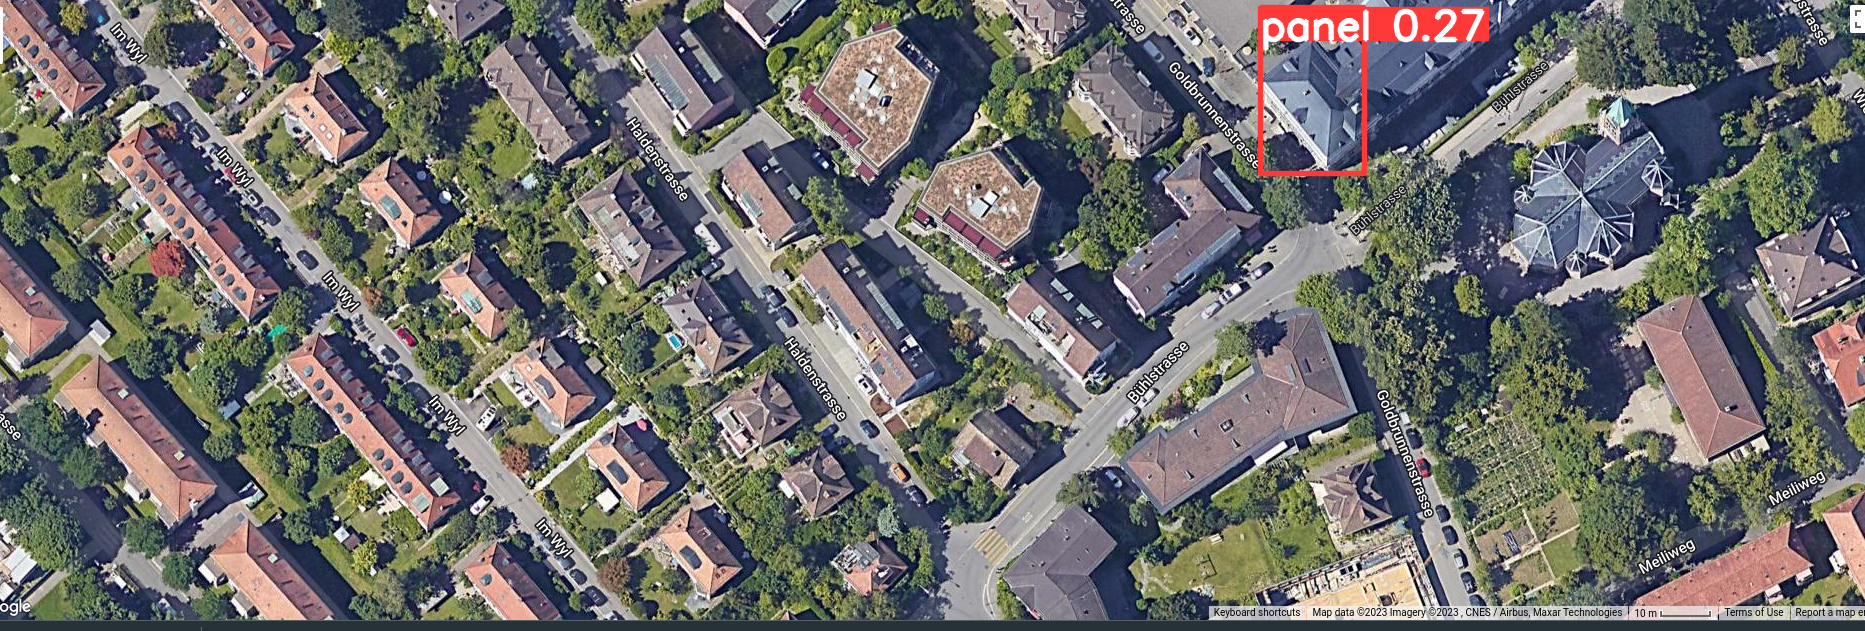

In [ ]:
Image.fromarray(result.plot()[:,:,::-1])